# Paper ST Sloping - 64 beats

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.metrics import specificity_score
import random
import time

In [2]:
THREADS_TO_USE = 4

## Load dataset

In [3]:
data = pd.read_csv('../dataset/st_dataset_64beats.csv')
data = data.dropna()
data.head()

,id,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,...,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16,label
0,e0106,267.535629,270.981533,270.243834,76.791207,11.207306,0.483334,-0.435149,-0.637676,-0.096703,...,-0.047331,0.034527,-0.042788,0.048729,-0.072291,0.006842,-0.025811,-0.008343,-0.007415,NSR
1,e0106,277.949875,283.546637,283.543383,80.370321,11.621628,0.480582,-0.437337,-0.666380,-0.138188,...,-0.053865,0.034099,-0.034026,0.038144,-0.071427,0.011442,-0.027634,-0.009450,-0.002719,NSR
2,e0106,280.952321,289.729213,288.768479,81.676148,11.842770,0.479468,-0.434101,-0.641674,-0.075015,...,-0.041838,0.031072,-0.035728,0.040951,-0.067828,0.007170,-0.022649,-0.013308,-0.001871,NSR
3,e0106,266.093352,277.366979,279.066959,79.365536,11.515873,0.479998,-0.433339,-0.648197,-0.093792,...,-0.047719,0.029625,-0.035988,0.049478,-0.081219,0.019213,-0.029185,-0.014198,-0.000186,NSR
4,e0106,279.838160,290.933842,289.849559,81.839924,11.791220,0.479852,-0.432266,-0.660649,-0.107788,...,-0.050448,0.030725,-0.035125,0.042994,-0.070263,0.010677,-0.027446,-0.011952,-0.001447,NSR


In [4]:
data['label'].replace("ST-", "ST", inplace=True)
data['label'].replace("ST+", "ST", inplace=True)

In [5]:
data['label'].value_counts()

NSR    6531
ST     1990
Name: label, dtype: int64

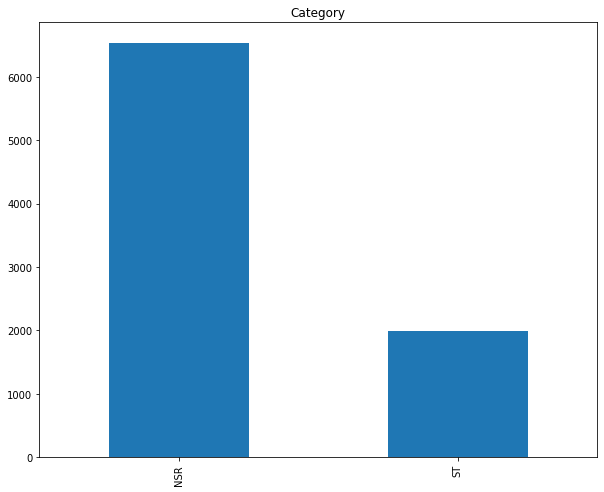

In [6]:
data['label'].value_counts().plot(kind='bar', title='Category', figsize=(10,8))
plt.show()

In [7]:
data.corr()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,mfw_5,...,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16
dw_1,1.000000,0.273382,0.122628,0.083674,0.051094,0.221600,-0.049649,0.078730,-0.012908,0.013862,...,-0.117220,-0.037767,-0.071736,-0.046960,-0.038058,-0.092294,-0.054016,-0.072729,-0.130987,-0.124267
dw_2,0.273382,1.000000,0.838009,0.506753,0.191967,0.386284,-0.517805,-0.334992,-0.004812,0.033948,...,-0.102493,0.182840,0.234210,0.178912,0.060450,0.039959,0.136143,0.005734,-0.118431,-0.066128
dw_3,0.122628,0.838009,1.000000,0.707121,0.290188,0.236678,-0.561877,-0.475222,0.011125,0.014124,...,-0.197277,0.158323,0.273116,0.121813,-0.051209,0.069581,0.038555,-0.024726,-0.136079,-0.044854
dw_4,0.083674,0.506753,0.707121,1.000000,0.871892,-0.017655,-0.285199,-0.270161,0.009232,0.003634,...,-0.149766,0.073674,0.107847,0.080194,-0.042344,0.051053,0.026543,-0.037506,-0.119712,-0.043279
dw_5,0.051094,0.191967,0.290188,0.871892,1.000000,-0.129453,-0.030009,-0.050190,0.002565,-0.000720,...,-0.059404,0.011401,-0.015802,0.062258,0.002897,0.013172,0.024296,-0.044898,-0.070291,-0.028559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfr_12,-0.092294,0.039959,0.069581,0.051053,0.013172,-0.160514,0.118367,0.127268,-0.005908,0.006278,...,-0.134908,-0.218479,-0.043561,0.050509,0.078646,1.000000,0.025204,0.020729,-0.368802,-0.228329
cfr_13,-0.054016,0.136143,0.038555,0.026543,0.024296,0.066207,-0.006270,0.019160,0.007572,-0.003219,...,0.180735,0.047865,-0.208494,-0.263557,0.025616,0.025204,1.000000,0.246144,0.176991,-0.125499
cfr_14,-0.072729,0.005734,-0.024726,-0.037506,-0.044898,-0.013333,0.037817,0.030309,0.006547,-0.008574,...,0.131588,0.237481,0.033791,-0.177838,-0.278564,0.020729,0.246144,1.000000,0.233453,-0.128832
cfr_15,-0.130987,-0.118431,-0.136079,-0.119712,-0.070291,0.043544,0.078133,0.032731,0.009685,-0.019258,...,0.301428,0.154375,-0.085936,-0.131212,-0.053772,-0.368802,0.176991,0.233453,1.000000,0.371065


In [8]:
y = data['label'].values
X = data.loc[:, ~data.columns.isin(["id", "label"])].copy()

In [9]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

## Feature selection

### Exclude features with corr > 0.95

In [10]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [11]:
print(correlated_features)

{'fft_235', 'fft_227', 'fft_253', 'fft_143', 'fft_152', 'fft_180', 'fft_207', 'fft_242', 'fft_140', 'fft_158', 'fft_195', 'fft_224', 'fft_177', 'fft_182', 'mfw_16', 'fft_232', 'mfw_7', 'fft_234', 'fft_190', 'fft_155', 'fft_239', 'fft_171', 'fft_188', 'fft_147', 'fft_206', 'fft_244', 'fft_254', 'fft_173', 'fft_139', 'fft_230', 'fft_162', 'fft_172', 'fft_191', 'fft_240', 'mfw_8', 'fft_186', 'fft_176', 'fft_205', 'fft_219', 'fft_246', 'fft_202', 'fft_211', 'fft_215', 'fft_236', 'fft_243', 'fft_245', 'fft_200', 'fft_233', 'fft_131', 'fft_250', 'fft_214', 'fft_134', 'mfw_6', 'mfw_14', 'fft_204', 'fft_198', 'fft_209', 'mfw_15', 'fft_187', 'fft_133', 'fft_225', 'fft_222', 'fft_189', 'fft_151', 'fft_237', 'cfr_16', 'mfw_9', 'fft_221', 'fft_183', 'fft_170', 'fft_132', 'fft_156', 'fft_145', 'fft_184', 'fft_165', 'fft_161', 'fft_166', 'fft_252', 'fft_169', 'fft_220', 'fft_229', 'fft_163', 'fft_197', 'fft_137', 'fft_159', 'fft_213', 'fft_248', 'fft_141', 'fft_136', 'fft_160', 'fft_192', 'fft_193',

### Random forest embeded for features selection

In [12]:
cols_no_corr = [col for col in X.columns if col not in correlated_features]

In [13]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE), threshold='1.25*median')
embeded_rf_selector.fit(X[cols_no_corr], y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=4, random_state=101),
                threshold='1.25*median')

In [14]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X[cols_no_corr].loc[:,embeded_rf_support].columns.tolist()

print('\n'.join(embeded_rf_feature), '\nselected features:', len(embeded_rf_feature))

dw_1
dw_2
dw_3
dw_4
dw_5
mfw_1
mfw_2
mfw_3
mfw_4
fft_1
fft_2
fft_3
fft_4
fft_5
fft_6
fft_7
fft_8
fft_9
fft_10
fft_11
fft_12
fft_13
fft_14
fft_15
fft_16
fft_17
fft_19
fft_20
fft_22
fft_30
fft_33
fft_34
fft_35
fft_37
ar_1
ar_2
ar_3
ar_4
ar_5
ar_6
ar_7
ar_8
ar_9
ar_10
ar_11
ar_12
ar_13
ar_14
ar_15
ar_16
var
cfr_1
cfr_2
cfr_3
cfr_4
cfr_5
cfr_6
cfr_7
cfr_8
cfr_9
cfr_10
cfr_11
cfr_12
cfr_13
cfr_14
cfr_15 
selected features: 66


### Visualization best features

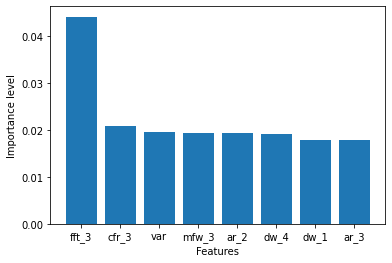

In [15]:
features_dict = dict(zip(cols_no_corr, embeded_rf_selector.estimator_.feature_importances_))
features_dict = dict(sorted(features_dict.items(), key=lambda item: item[1], reverse=True))

best_features = dict()
for index, (key, value) in enumerate(features_dict.items()):
    if index < 8:
        best_features[key] = value

plt.bar(range(len(best_features)), list(best_features.values()), align='center', )
plt.xticks(ticks=range(len(best_features)), labels=best_features.keys())
plt.xlabel('Features')
plt.ylabel('Importance level')
plt.show()

## Filter features

In [16]:
X_fsel = X[embeded_rf_feature]
X_fsel.head()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,fft_1,...,cfr_6,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15
0,267.535629,270.981533,270.243834,76.791207,11.207306,0.483334,-0.435149,-0.637676,-0.096703,-1.065012,...,0.016873,0.040724,-0.047331,0.034527,-0.042788,0.048729,-0.072291,0.006842,-0.025811,-0.008343
1,277.949875,283.546637,283.543383,80.370321,11.621628,0.480582,-0.437337,-0.666380,-0.138188,-2.207264,...,0.011581,0.052652,-0.053865,0.034099,-0.034026,0.038144,-0.071427,0.011442,-0.027634,-0.009450
2,280.952321,289.729213,288.768479,81.676148,11.842770,0.479468,-0.434101,-0.641674,-0.075015,-0.855778,...,0.031430,0.033720,-0.041838,0.031072,-0.035728,0.040951,-0.067828,0.007170,-0.022649,-0.013308
3,266.093352,277.366979,279.066959,79.365536,11.515873,0.479998,-0.433339,-0.648197,-0.093792,-1.105237,...,0.018259,0.048839,-0.047719,0.029625,-0.035988,0.049478,-0.081219,0.019213,-0.029185,-0.014198
4,279.838160,290.933842,289.849559,81.839924,11.791220,0.479852,-0.432266,-0.660649,-0.107788,14.855103,...,0.015173,0.050778,-0.050448,0.030725,-0.035125,0.042994,-0.070263,0.010677,-0.027446,-0.011952


## Random Forest - 1000x random split

In [17]:
classes = np.unique(label_encoder.inverse_transform(y))

result_df = pd.DataFrame()

seeds = random.sample(range(1, 2**32 - 1), 1000)
for i, seed in enumerate(seeds):
    start_time = time.time()

    # Train and Test split
    x_train, x_test, y_train, y_test = train_test_split(X_fsel, y, test_size=0.2, random_state=seed)

    # Training
    model = RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE).fit(x_train, y_train)

    # Prediction
    y_pred = model.predict(x_test)

    # Decode
    y_test_dec = label_encoder.inverse_transform(y_test)
    y_pred_dec = label_encoder.inverse_transform(y_pred)

    # get metrics
    report = classification_report(y_true=y_test_dec, y_pred=y_pred_dec, output_dict=True)
    specificity = specificity_score(y_true=y_test_dec, y_pred=y_pred_dec, average="weighted")

    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']


    # save result in result_df
    result_df = result_df.append({
        "accuracy": acc,
        "specificity": specificity,
        "precision": precision,
        "recall": recall,
        "f1": f1
     }, ignore_index=True)
    end_time = time.time()

    elapsed_seconds = end_time - start_time
    # Log result
    print("#---------------------#")
    print(i+1, "of", len(seeds), "-", elapsed_seconds, "s")
    print("Accuracy", acc, "precision", precision, "specificity", specificity, "recall", recall, "f1", f1)
    print("#---------------------#")

#---------------------#
1 of 1000 - 1.344999074935913 s
Accuracy 0.906158357771261 precision 0.9057527972192487 specificity 0.7620424852810053 recall 0.906158357771261 f1 0.9017406143295984
#---------------------#
#---------------------#
2 of 1000 - 1.2920000553131104 s
Accuracy 0.8997067448680351 precision 0.8991919215243389 specificity 0.7406110236309791 recall 0.8997067448680351 f1 0.8943619621114333
#---------------------#
#---------------------#
3 of 1000 - 1.2619996070861816 s
Accuracy 0.9055718475073313 precision 0.9069815124756913 specificity 0.7424858590721781 recall 0.9055718475073313 f1 0.8999469678902846
#---------------------#
#---------------------#
4 of 1000 - 1.25700044631958 s
Accuracy 0.9049853372434018 precision 0.9055925138368518 specificity 0.7416350688218771 recall 0.9049853372434018 f1 0.8995159658314538
#---------------------#
#---------------------#
5 of 1000 - 1.2709989547729492 s
Accuracy 0.9155425219941349 precision 0.9144107881067854 specificity 0.770772582

In [18]:
result_df.head(10)

,accuracy,specificity,precision,recall,f1
0,0.906158,0.762042,0.905753,0.906158,0.901741
1,0.899707,0.740611,0.899192,0.899707,0.894362
2,0.905572,0.742486,0.906982,0.905572,0.899947
3,0.904985,0.741635,0.905593,0.904985,0.899516
4,0.915543,0.770773,0.914411,0.915543,0.911919
5,0.914370,0.759135,0.915782,0.914370,0.909600
6,0.917302,0.773897,0.916098,0.917302,0.913851
7,0.913783,0.758592,0.914451,0.913783,0.909160
8,0.901466,0.743291,0.903237,0.901466,0.895645
9,0.905572,0.743940,0.905148,0.905572,0.900509


In [19]:
print("######## Total ########")
print("Accuracy", result_df["accuracy"].mean())
print("Precision", result_df["precision"].mean())
print("Specificity",  result_df["specificity"].mean())
print("Recall",  result_df["recall"].mean())
print("F1",  result_df["f1"].mean())

result_df.to_csv('result/bin_64beats_1000x_random_split.csv')

######## Total ########
Accuracy 0.9096903225806452
Precision 0.9095717181457572
Specificity 0.7535863872276001
Recall 0.9096903225806452
F1 0.9049997671204685
